In [598]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandarallel import pandarallel
import regex as re
import glob
import os
pandarallel.initialize(progress_bar=True, nb_workers= 16, verbose = 0)
tqdm.pandas()

In [599]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [600]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv' # path
#path = r'/Users/kakaoohnehose/GitHub/Bachelor-Arbeit/notebooks/classifiers/poc/lda/lda_score_csv' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*8.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(m.group("size"))
    file_k_topic.append(m2.group("topics"))



D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv
loading from : 8 files


In [601]:
df


,size,Unnamed: 0,class,topic,count,num_topics,hits
index,,,,,,,
0,1000,0,ErnÃ¤hrung,13.0,68,24,0.068000
10,1000,10,Umweltwissenschaften,NaN,1,24,0.001000
9,1000,9,Umweltwissenschaften,20.0,1,24,0.001000
7,1000,7,Medizin,NaN,2,24,0.002000
6,1000,6,Medizin,20.0,1,24,0.001000
...,...,...,...,...,...,...,...
21,256000,21,Medizin,4.0,1,24,0.000004
20,256000,20,Medizin,23.0,25,24,0.000098
19,256000,19,Medizin,21.0,1,24,0.000004


In [602]:
arrays = np.array([file_k_size,file_k_topic])
#arrays=np.transpose(arrays)
mindex=pd.MultiIndex.from_arrays(arrays,names=("a","b"))
mindex

MultiIndex([(   '1000', '8'),
            (    '100', '8'),
            (  '16000', '8'),
            ( '256000', '8'),
            (   '4000', '8'),
            (    '400', '8'),
            ('5000000', '8'),
            (  '64000', '8')],
           names=['a', 'b'])

In [603]:
df = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)
df["num_topics"] = list(file_k_topic)[1]
df.index.set_names(["size", "index"], inplace=True)
df = df.sort_index(level=['size'], ascending=[True])
df=df.reset_index(level='size')
df['size']=df['size'].astype(int)
df= df.sort_values('size')

In [604]:
df['hits']= df['count'].astype(int) / df['size'].astype(int)

In [605]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv_test' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(int(m.group("size")))
    file_k_topic.append(m2.group("topics"))

D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv_test
loading from : 8 files


In [606]:
df1 = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)

In [607]:
df1.index.set_names(["size", "index"], inplace=True)
df1 = df1.sort_index(level=['size'], ascending=True)
df1.columns = ['Klassen', 'Support']
df1=df1.reset_index(level='size')
df1['size']=df1['size'].astype(int)
df1.reset_index(drop=True,inplace=True)


In [608]:
df2 = df1.groupby(['size']).sum()

C:\Users\Keks\AppData\Local\Temp\ipykernel_27836\3246857734.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby(['size']).sum()


In [609]:
newdf = pd.DataFrame(np.repeat(df2.values, 4, axis=0))
newdf.columns = df2.columns

In [610]:
df1['perc'] = df1['Support'] / newdf['Support']

In [611]:
#df1 = df1.head(20)

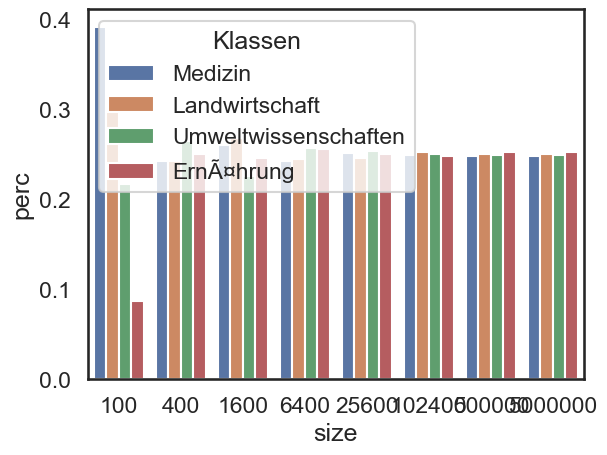

In [612]:
ax = sns.barplot(data=df1,x="size",  y="perc", hue="Klassen")

KeyError: 4.0

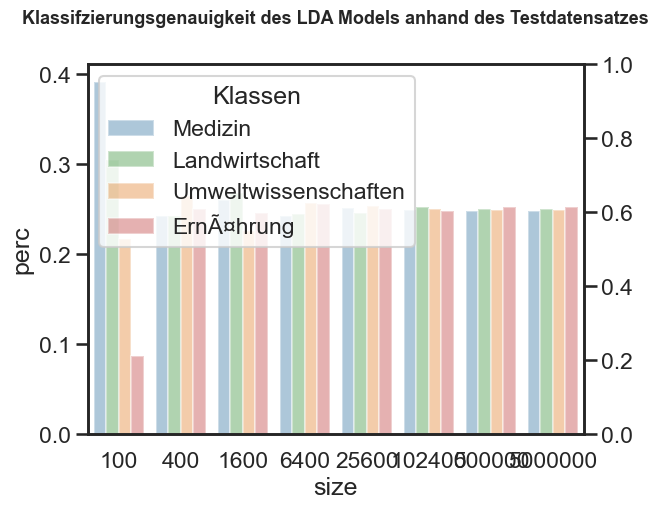

In [613]:
palette = {
    0: 'tab:blue',
    1: 'tab:green',
    2: 'tab:orange',
    3: 'tab:red',
}
palette1 = {
    'Medizin': 'tab:blue',
    'Landwirtschaft': 'tab:green',
    'Umweltwissenschaften': 'tab:orange',
    'ErnÃ¤hrung': 'tab:red',
}
fig = plt.figure()
ax = fig.add_subplot(111)
ax =  sns.barplot(data=df1,x="size",  y="perc", hue="Klassen", 
                        ax=ax,
                        palette=palette1, alpha=0.40) 

#ax.set(xlabel="Menge an Zugewiesenen Topics pro Klasse",ylabel="Klasse(Averbis) & Topic(LDA)")
ax.text(x=0.5, y=1.1, s='Klassifzierungsgenauigkeit des LDA Models anhand des Testdatensatzes',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)

ax2 = ax.twinx()
ax2 = sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax= ax2, palette=palette)
#ax.text(x=0.5, y=1.05, s="bei einer Testdatensatzgröße von " + str(len(df))+ " Publikationen und "+ list(file_k_topic)[1] +' "Topics"',
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax2.set_ylabel(None)
a= 0.0
b= 0.40
n = 0
ax.set_ylim(a,b)
ax2.set_ylim(a,b)
ax2.set_yticks(np.linspace(a,b,n))
#fig = ax.get_figure()
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2 , labels + labels2, loc=1, title="Klassen und Topics (Zahlen)")
ax2.legend([], [], frameon=False)
ax2.set_ylabel(None)
ax2.legend([], [], frameon=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

C:\Users\Keks\AppData\Local\Temp\ipykernel_27836\659869505.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax=ax2,ci=None)


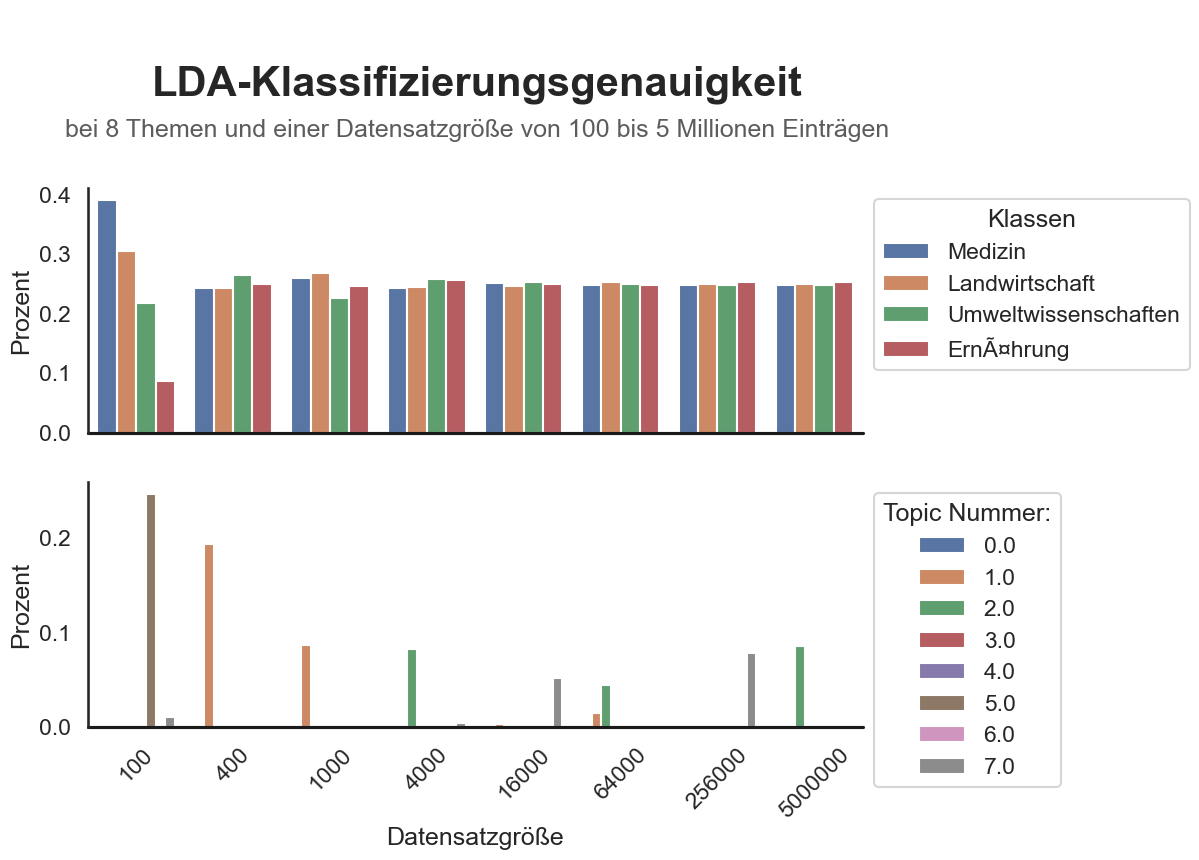

In [615]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax1.text(x=0.8, y=1.9, s='LDA-Klassifizierungsgenauigkeit',
        fontsize=30, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
ax1.text(x=0.8, y=1.8, s="bei 8 Themen und einer Datensatzgröße von 100 bis 5 Millionen Einträgen",
        fontsize=18, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

# Generate some sequential data
sns.barplot(data=df1,x="size",  y="perc", hue="Klassen", ax = ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Prozent")
ax1.set_xlabel("")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))



# Center the data to make it diverging
sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax=ax2,ci=None)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Prozent")
ax2.set_xlabel("Datensatzgröße")
ax2.legend(title= "Topic Nummer:")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
ax2.tick_params(axis='x', rotation=45)

sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)
#f.savefig("grafiken\\LDA_f1_support_12.png",dpi=300, bbox_inches = "tight") 